<a href="https://colab.research.google.com/github/torrhen/data_science/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Supervised example: Linear regression

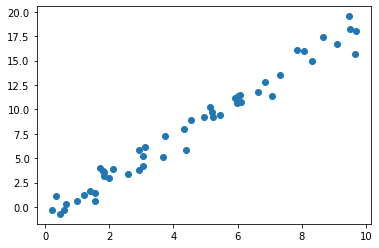

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

SEED = 42
N_SAMPLES = 50

# set random seed
rng = np.random.RandomState(SEED)

# generate 50 synthetic data samples and targets
x = 10 * rng.rand(N_SAMPLES) # x ~ U[0, 10)
y = 2 * x - 1 + rng.randn(N_SAMPLES) # y = 2x-1 + (e ~ N(0, 1))

# plot data
plt.scatter(x, y)

In [ ]:
# reshape x to [n_samples, n_features]
X = x[:, np.newaxis] # add 1 additional dimension with np.newaxis
print(X.shape) # [50, 1]
print(y.shape) # [50,]

(50, 1)
(50,)


In [ ]:
from sklearn.linear_model import LinearRegression

# create ordinary least squares regression model
model = LinearRegression()

In [ ]:
# fit linear regresison model to data
model.fit(X, y)

# show the coefficient values for best fit line slope and intercept
print(f"w1: {model.coef_}")
print(f"w0: {model.intercept_}")

w1: [1.9776566]
w0: -0.9033107255311146


In [ ]:
# predict for unknown data
# generate 50 evenly spaced values between -1 and 11
X_pred = np.linspace(-1, 11)[:, np.newaxis]
# predict targets with model
y_pred = model.predict(X_pred)

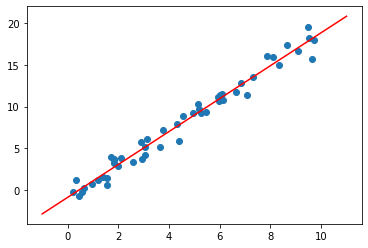

In [ ]:
# plot original data
plt.scatter(X, y)
# plot predicted best fit line
plt.plot(X_pred, y_pred, c='r')

### Supervised example: Iris classification

In [ ]:
import seaborn as sns

# import dataset
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# set up features data
X_iris = iris_data.drop('species', axis=1)
# set up target
y_iris = iris_data['species']

print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split

# split into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [ ]:
from sklearn.naive_bayes import GaussianNB

# gaussian naive bayes model
model = GaussianNB()
# train model
model.fit(X_train, y_train)
# predict on test data set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# calculate accuracy of model
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.9736842105263158


### Unsupervised example: Iris dimensionality

In [ ]:
from sklearn.decomposition import PCA

# 2D principal component analysis
model = PCA(n_components=2)
model.fit(X_iris)

# project 4D iris data to 2D
X_iris_2D = model.transform(X_iris)
print(X_iris_2D.shape) # [150, 4] -> [150, 2]

(150, 2)


In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


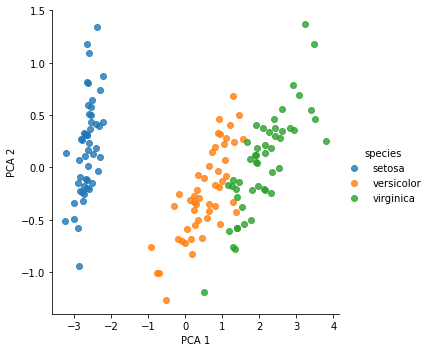

In [ ]:
# create PCA columns in original data frame
iris_data['PCA 1'] = X_iris_2D[:, 0]
iris_data['PCA 2'] = X_iris_2D[:, 1]

# plot PCA graph of projected iris data
sns.lmplot(x='PCA 1',
           y='PCA 2',
           hue='species',
           data=iris_data,
           fit_reg=False)

### Unsupervised example: Iris clustering

In [ ]:
from sklearn.mixture import GaussianMixture

# gaussian mixture model
model = GaussianMixture(n_components=3, covariance_type='full')
# clcuster data into gaussian blobs
model.fit(X_iris) # no targets provided for unsupervised learning
# predict cluster labels
y_pred = model.predict(X_iris)

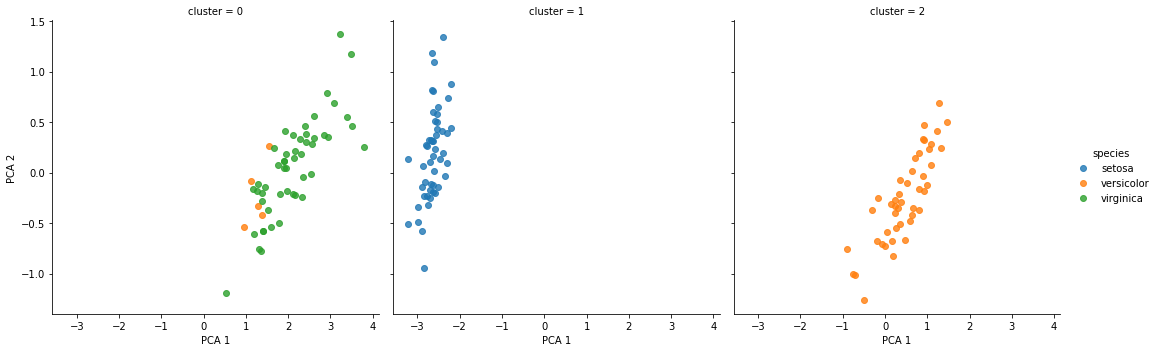

In [ ]:
# add cluster labels to original iris dataframe
iris_data['cluster'] = y_pred
sns.lmplot(x="PCA 1",
           y="PCA 2",
           hue="species",
           data=iris_data,
           col='cluster',
           fit_reg=False)

### Handwritten Digits

In [ ]:
from sklearn.datasets import load_digits

# load handwritten digits dataset
digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


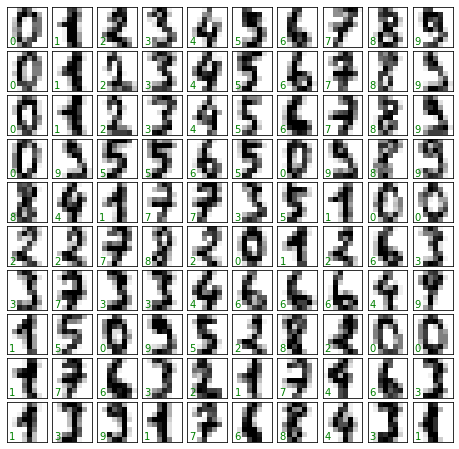

In [ ]:
import matplotlib.pyplot as plt

# setup plot
fig, ax = plt.subplots(nrows=10,
                       ncols=10,
                       figsize=(8, 8), # 8 x 8 digit images
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1) # add padding between subplots
                       )

# plot each image from digit data set along with true label
for i, ax in enumerate(ax.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='g')

In [ ]:
# flatten each image sample
X_digits = digits.data
print(X_digits) # [1797, 64]

y_digits = digits.target
print(y_digits) # [1797,]

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


### Unsupervised learning example: Dimensionality reduction

In [ ]:
from sklearn.manifold import Isomap

# manifold learning algorithm projection to two dimensions from 64
isomap = Isomap(n_components=2)
isomap.fit(X_digits)

# project data to two dimensions
X_digits_2D = isomap.transform(X_digits)
print(X_digits_2D.shape) # [1797, 2]

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


<ipython-input-23-45f9cea62c02>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


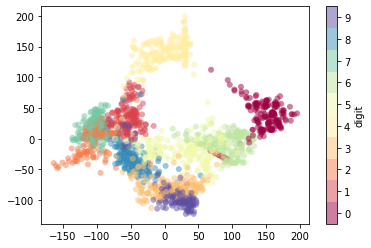

In [ ]:
# scatter plot of digits in 2D
plt.scatter(X_digits_2D[:, 0],
            X_digits_2D[:, 1],
            c=digits.target, # unique colour for each digit label
            edgecolor='none',
            alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))

# color bar legend
plt.colorbar(label='digit', ticks=range(10))
# set custom colour limit within some range
plt.clim(-0.5, 9.5)

In [ ]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=0)

In [ ]:
# apply gaussian naive bayes classification
model = GaussianNB()
model.fit(X_train, y_train)
# predict digit labels on test data
y_preds = model.predict(X_test)

In [ ]:
# calculate classification accuracy
accuracy_score(y_test, y_preds)

0.8333333333333334

Text(91.68, 0.5, 'True labels')

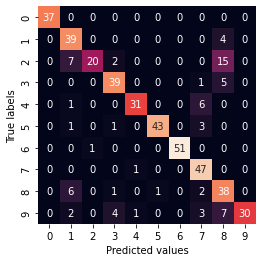

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate confusion matrix for each possible digit class
matrix = confusion_matrix(y_test, y_preds)
# plot confusion matrix
sns.heatmap(matrix, square=True, annot=True, cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True labels")

Large number of 2's are incorrectly classified by the model as 1's or 8's.

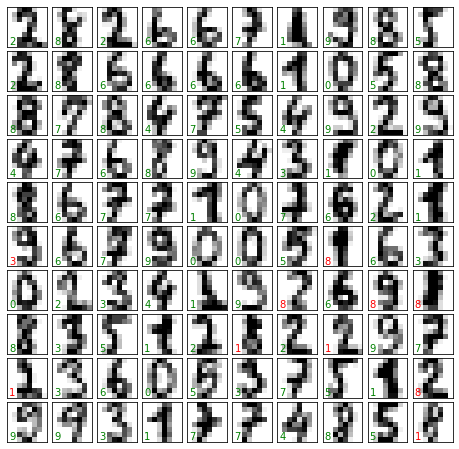

In [ ]:
# setup plot
fig, ax = plt.subplots(nrows=10,
                       ncols=10,
                       figsize=(8, 8), # 8 x 8 digit images
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1) # add padding between subplots
                       )

# reshape flatten test data into 8 x 8 images to plot
test_images = X_test.reshape(-1, 8, 8)

# plot images and target labels
for i, ax in enumerate(ax.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_preds[i]),
            transform=ax.transAxes,
            # change colour of target label if the image was incorrectly classified
            color='green' if (y_test[i] == y_preds[i]) else 'red')